# India Suicide Rates EDA and Future Prediction using ML model(2001-2012)

<h3>Context</h3>

This data set contains yearly suicide detail of all the states/u.t of India by various parameters from 2001 to 2012.

<h3>Content</h3>

Time Period: 2001 - 2012 <br>
Granularity: Yearly <br>
Location: States and U.T's of India

<h3>Parameters</h3>

    1). Total Suicides in India
    2). Total Suicides In India State Wise
    3). Total Suicides In India Year Wise
    4). Total Suicides In India Gender Wise
    5). Total Suicides In India State-Year Wise
    6). Total Suicides In India State-Gender Wise
    7). Total Suicides In India Year-Gender Wise
    8). Total Suicides In India State-Year-Gender Wise
    9). Predict Future Suicides in India Using Machine Learning Algorithms
    10). Predict Future Suicides in India Using Machine Learning Linear Regression Algorithm
    11). Predict Future Suicides in India Using Machine Learning Polynomial Regression

<h3>Acknowledgements</h3>

National Crime Records Bureau (NCRB), Govt of India has shared this dataset under Govt. Open Data License - India. <br>
Source Link: (https://data.gov.in/)

# Table of Contents:

1. <a href='#Importing-necessary-libraries:'><h3>Importing Libraries</h3></a>
2. <a href='#Reading-the-dataset:'><h3>Reading the dataset</h3></a>
3. <a href='#Exploratory-Data-Analysis:'><h3>Exploratory Data Analysis (EDA)</h3></a>
4. <a href='#Machine-learning:'><h3>Machine Learning Algorithms</h3></a>

# Importing necessary libraries:

In [1]:
# Data Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [2]:
# Setting DPI for Figure Level Plots
# plt.rcParams["figure.dpi"] = 720

# Reading the dataset:

In [3]:
df = pd.read_csv('Suicides in India 2001-2012.csv')

In [4]:
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [5]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [7]:
df.shape

(237519, 7)

In [8]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [9]:
df.describe(include='object')

,State,Type_code,Type,Gender,Age_group
count,237519,237519,237519,237519,237519
unique,38,5,69,2,6
top,Madhya Pradesh,Causes,Others (Please Specify),Male,15-29
freq,6792,109200,7263,118879,45223


# Exploratory Data Analysis:

####  Total suicide in india

In [10]:
print('Total suicide in india from 2001-12 yrs:', df['Total'].sum())

Total suicide in india from 2001-12 yrs: 13071734


#### Total Suicide In india, state wise

In [11]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [12]:
df.shape

(237519, 7)

In [13]:
suicide_state_wise = df.groupby('State')['Total'].sum().reset_index()
suicide_state_wise

,State,Total
0,A & N Islands,8109
1,Andhra Pradesh,814059
2,Arunachal Pradesh,6633
3,Assam,172276
4,Bihar,46214
5,Chandigarh,5164
6,Chhattisgarh,302354
7,D & N Haveli,3430
8,Daman & Diu,1391
9,Delhi (Ut),84272


In [14]:
suicide_state_wise1 = suicide_state_wise.drop(labels=[31,32,33], axis=0)
suicide_state_wise1 = suicide_state_wise1.sort_values('Total', ascending = False)
suicide_state_wise1

,State,Total
20,Maharashtra,901945
37,West Bengal,849936
30,Tamil Nadu,818691
1,Andhra Pradesh,814059
16,Karnataka,734825
17,Kerala,538946
19,Madhya Pradesh,451535
11,Gujarat,330858
6,Chhattisgarh,302354
25,Odisha,267234


In [15]:
# Removing redundant values from 'States' Column:
df = df[(df['State'] != 'Total (All India)') 
        & (df['State'] != 'Total (States)') 
        & (df['State'] != 'Total (Uts)')]

In [16]:
df.shape

(236583, 7)

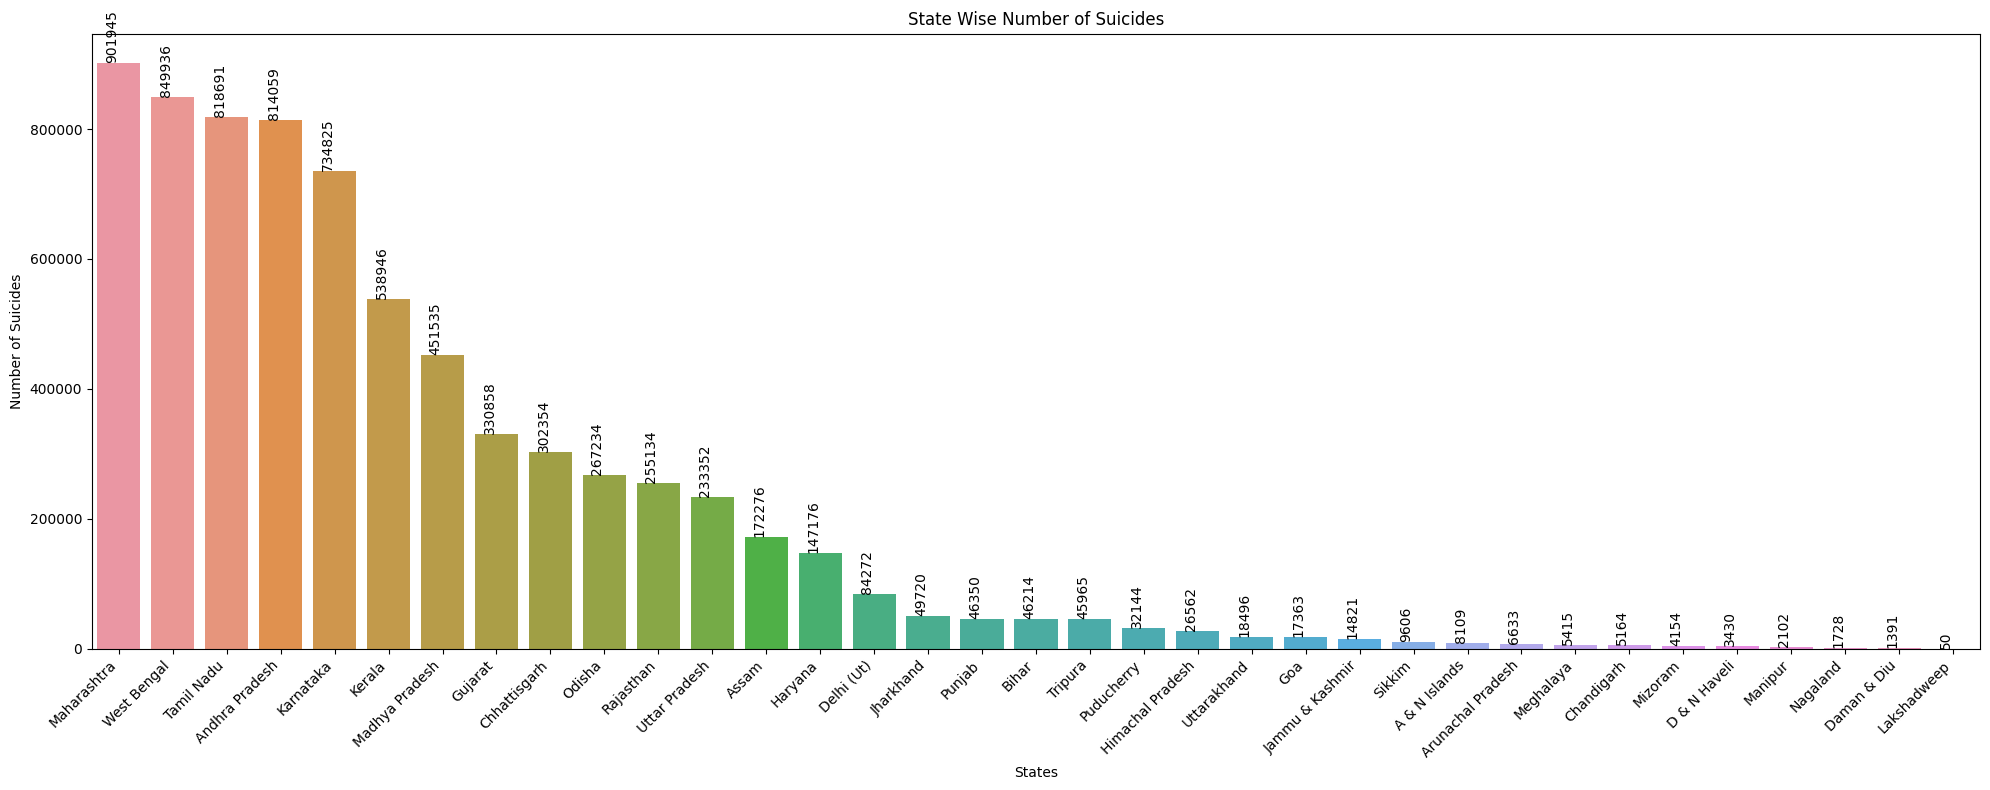

In [17]:
plt.figure(figsize=(20, 8))
labels = suicide_state_wise1['Total'].to_list()

ax = sns.barplot(x=suicide_state_wise1['State'], y=suicide_state_wise1['Total'])
plt.title('State Wise Number of Suicides')
plt.xlabel('States')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels

# Add data labels to the bars with diagonal orientation
for i in range(len(labels)):
    ax.text(i, suicide_state_wise1['Total'].iloc[i], labels[i], ha='right', va='bottom', rotation=90)

plt.tight_layout()
plt.show()


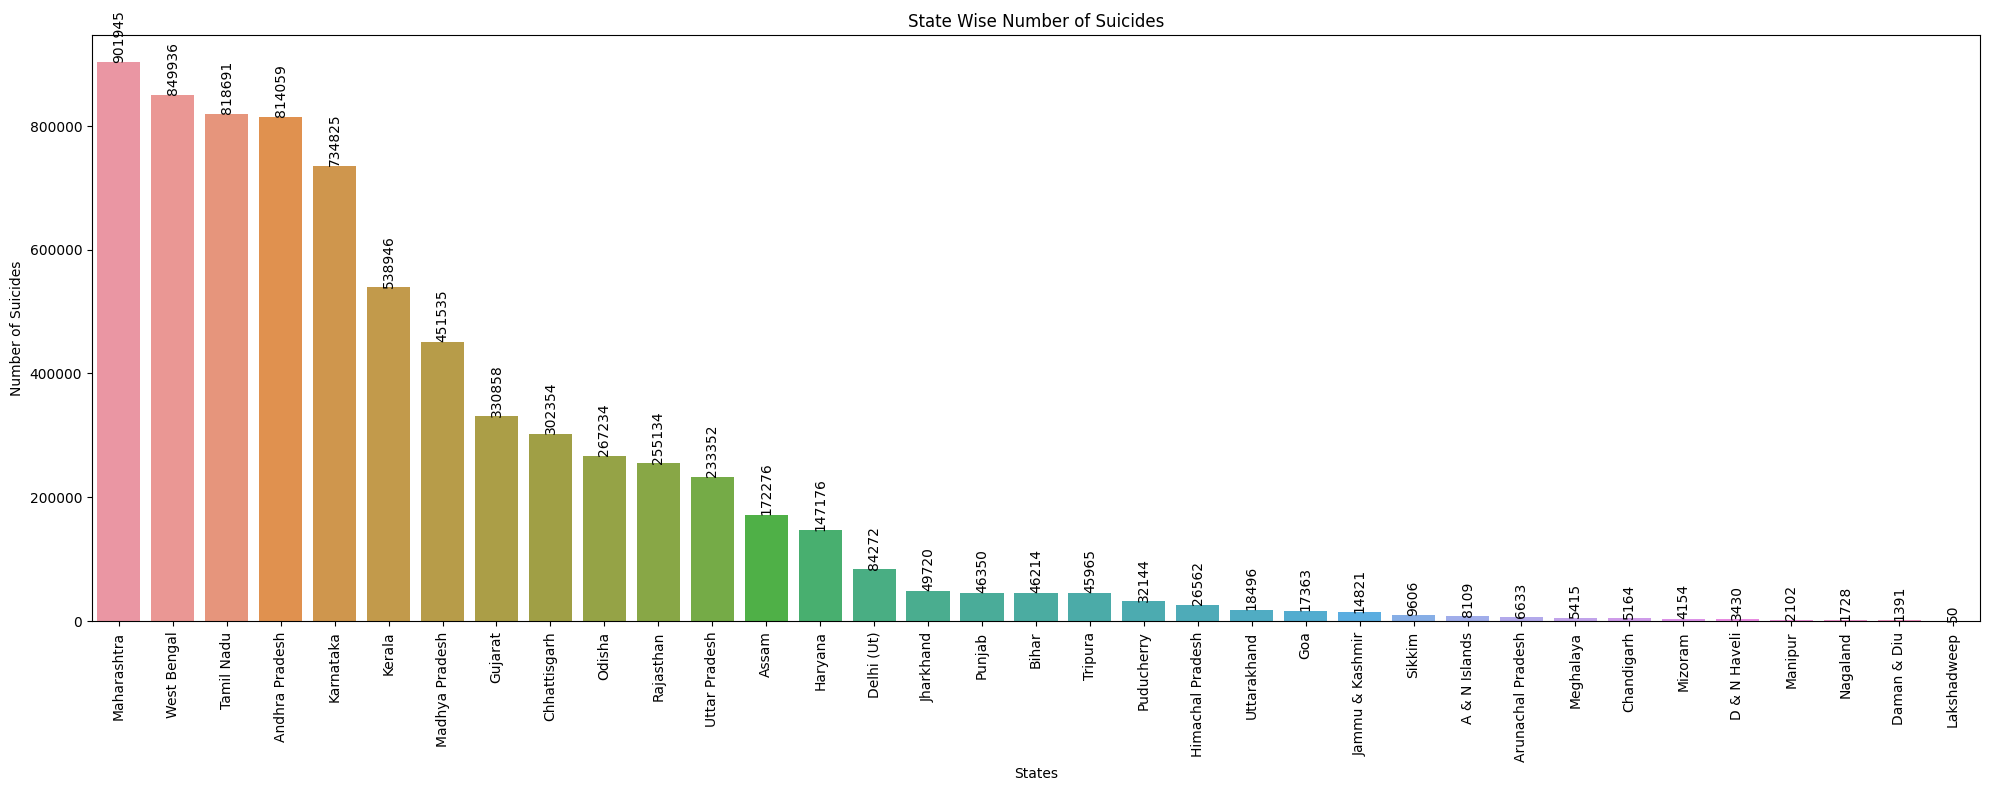

In [18]:
plt.figure(figsize=(20, 8))
labels = suicide_state_wise1['Total'].to_list()

ax = sns.barplot(x=suicide_state_wise1['State'], y=suicide_state_wise1['Total'])
plt.title('State Wise Number of Suicides')
plt.xlabel('States')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=90)  # Rotate the x-axis tick labels vertically

# Add data labels to the bars with vertical orientation
for i in range(len(labels)):
    ax.text(i, suicide_state_wise1['Total'].iloc[i], labels[i], ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()


In [19]:
#for only single state like Uttar Pradesh
index = df['State'] == 'Uttar Pradesh'
print('Total Suicide in UP in 2001-12: ',df[index].Total.sum())

Total Suicide in UP in 2001-12:  233352


#### Suicide in year-wise

In [20]:
suicide_Year_wise = df.groupby('Year')['Total'].sum().reset_index().sort_values('Year',ascending = True)
suicide_Year_wise

,Year,Total
0,2001,542440
1,2002,551980
2,2003,554218
3,2004,568349
4,2005,569545
5,2006,590543
6,2007,613119
7,2008,625014
8,2009,635429
9,2010,672926


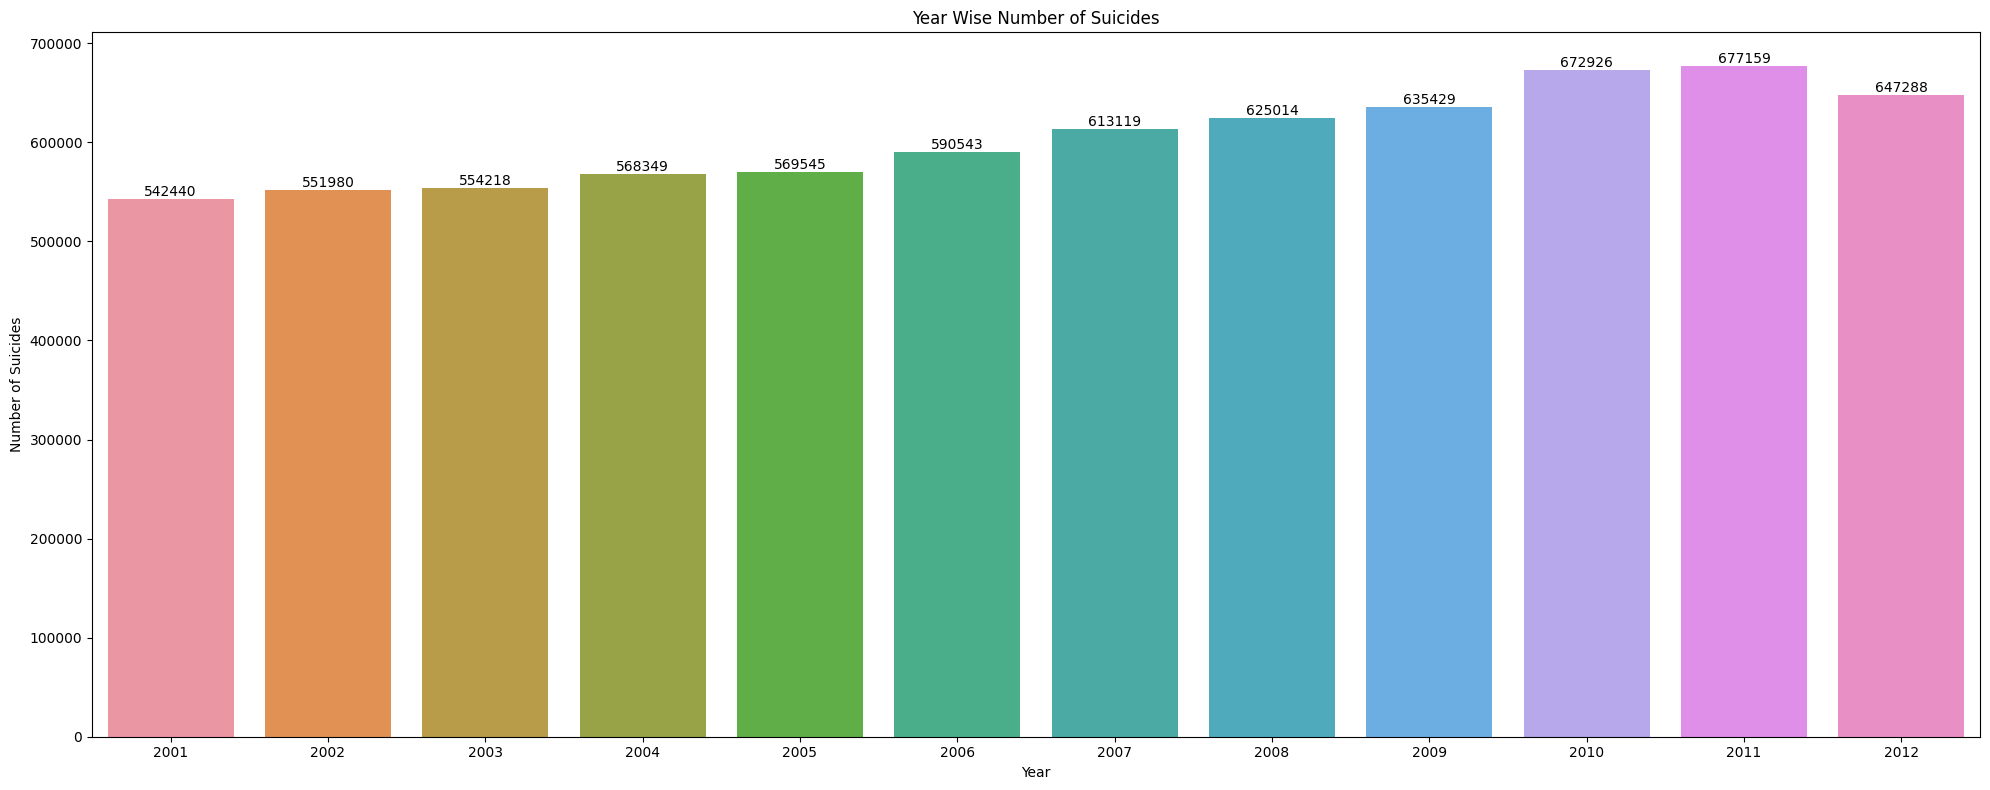

In [21]:
plt.figure(figsize=(20, 8))
labels = suicide_Year_wise['Total'].to_list()

ax = sns.barplot(x=suicide_Year_wise['Year'], y=suicide_Year_wise['Total'])
plt.title('Year Wise Number of Suicides')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
# plt.xticks(rotation=90)

# Add data labels to the bars
for i in range(len(labels)):
    ax.text(i, suicide_Year_wise['Total'].iloc[i], labels[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Total Suicide gender type

In [22]:
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [23]:
suicide_gender_wise = df.groupby('Gender')['Total'].sum().reset_index()
suicide_gender_wise

,Gender,Total
0,Female,2606922
1,Male,4641088


#### Total Suicides In India State-Year Wise

In [24]:
suicide_st_yr_wise = df.groupby(['Year','State'])['Total'].sum().reset_index().sort_values('Year',ascending = True)
suicide_st_yr_wise

,Year,State,Total
0,2001,A & N Islands,645
20,2001,Maharashtra,73090
21,2001,Manipur,205
22,2001,Meghalaya,435
23,2001,Mizoram,270
...,...,...,...
397,2012,Haryana,14135
398,2012,Himachal Pradesh,2636
399,2012,Jammu & Kashmir,2070
401,2012,Karnataka,63765


#### type of suicide

In [25]:
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [26]:
type_suic = df.groupby('Type')[['Total']].sum().reset_index().sort_values('Total',ascending = False)
type_suic_top = type_suic.head(10)
type_suic_top

,Type,Total
40,Married,1021774
49,Others (Please Specify),469147
7,By Hanging,460955
54,Primary,362827
42,Middle,342971
30,Family Problems,341952
44,No Education,321757
43,Never Married,318301
33,House Wife,285243
2,By Consuming Insecticides,275501


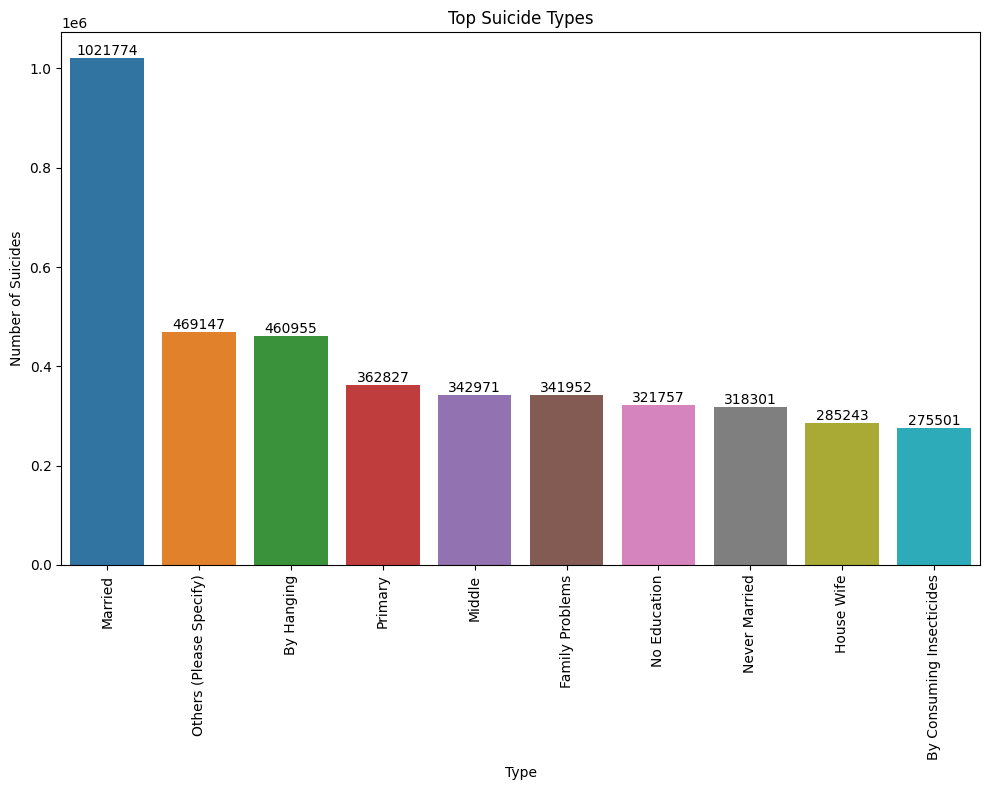

In [27]:
plt.figure(figsize=(10, 8))
labels = type_suic_top['Total'].to_list()

ax = sns.barplot(x=type_suic_top['Type'], y=type_suic_top['Total'])
plt.title('Top Suicide Types')
plt.xlabel('Type')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=90)

# Add data labels to the bars
for i in range(len(labels)):
    ax.text(i, type_suic_top['Total'].iloc[i], labels[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Machine learning:

#### Data prediction based on year only

In [28]:
year_wise = df.groupby('Year')['Total'].sum().reset_index()
year_wise

,Year,Total
0,2001,542440
1,2002,551980
2,2003,554218
3,2004,568349
4,2005,569545
5,2006,590543
6,2007,613119
7,2008,625014
8,2009,635429
9,2010,672926


In [29]:
#data must be always in array whenever use in ML and it must be 2 or more diemnsion
x = year_wise['Year'].values.reshape(-1,1)
y = year_wise['Total'].values.reshape(-1,1)

In [30]:
x

array([[2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [31]:
y

array([[542440],
       [551980],
       [554218],
       [568349],
       [569545],
       [590543],
       [613119],
       [625014],
       [635429],
       [672926],
       [677159],
       [647288]], dtype=int64)

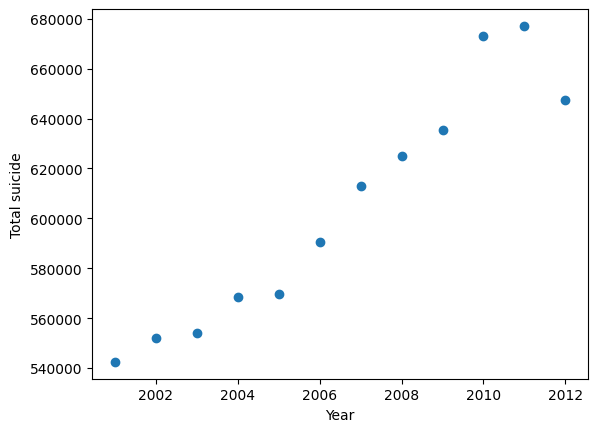

In [32]:
plt.scatter(year_wise['Year'],year_wise['Total'])
plt.xlabel('Year')
plt.ylabel('Total suicide')
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)
reg.coef_

array([[12710.76223776]])

In [34]:
reg.intercept_

array([-24900143.59673658])

In [35]:
yp = reg.predict(x) #predicted data, suicide year wise

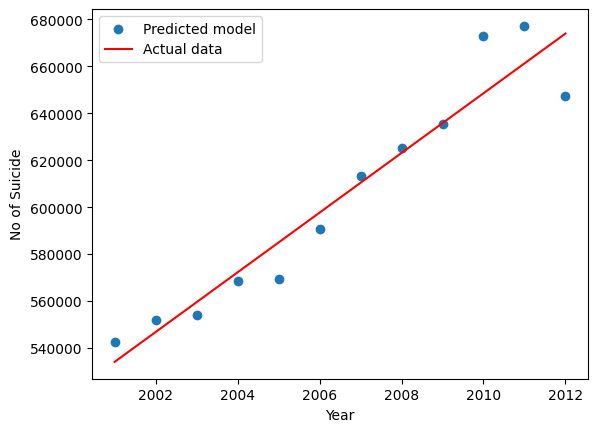

In [36]:
#line plot for prediction and scatter with actual
plt.scatter(x,y)
plt.plot(x,yp, color = 'r')
plt.xlabel('Year')
plt.ylabel('No of Suicide')
plt.legend(['Predicted model','Actual data'], loc = 'best')
plt.show()

In [37]:
accuracy = reg.score(x,y)
accuracy

0.9203657842369778

In [38]:
print('based on our predicted model,the expection no of suicide in 2020 ',reg.predict([[2020]]))

based on our predicted model,the expection no of suicide in 2020  [[775596.12354312]]


#### polynomial regression

In [39]:
x

array([[2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [40]:
y

array([[542440],
       [551980],
       [554218],
       [568349],
       [569545],
       [590543],
       [613119],
       [625014],
       [635429],
       [672926],
       [677159],
       [647288]], dtype=int64)

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 8)
poly.fit_transform(x)

array([[1.00000000e+00, 2.00100000e+03, 4.00400100e+06, 8.01200600e+09,
        1.60320240e+13, 3.20800800e+16, 6.41922402e+19, 1.28448673e+23,
        2.57025794e+26],
       [1.00000000e+00, 2.00200000e+03, 4.00800400e+06, 8.02402401e+09,
        1.60640961e+13, 3.21603203e+16, 6.43849613e+19, 1.28898692e+23,
        2.58055182e+26],
       [1.00000000e+00, 2.00300000e+03, 4.01200900e+06, 8.03605403e+09,
        1.60962162e+13, 3.22407211e+16, 6.45781643e+19, 1.29350063e+23,
        2.59088176e+26],
       [1.00000000e+00, 2.00400000e+03, 4.01601600e+06, 8.04809606e+09,
        1.61283845e+13, 3.23212826e+16, 6.47718503e+19, 1.29802788e+23,
        2.60124787e+26],
       [1.00000000e+00, 2.00500000e+03, 4.02002500e+06, 8.06015012e+09,
        1.61606010e+13, 3.24020050e+16, 6.49660200e+19, 1.30256870e+23,
        2.61165025e+26],
       [1.00000000e+00, 2.00600000e+03, 4.02403600e+06, 8.07221622e+09,
        1.61928657e+13, 3.24828887e+16, 6.51606746e+19, 1.30712313e+23,
        2.6

In [42]:
XX = poly.fit_transform(x)

In [43]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(XX,y)

LinearRegression()

In [44]:
reg1.coef_

array([[ 0.00000000e+00, -1.70093601e-12, -2.72001394e-18,
        -1.14424721e-17, -1.83674670e-14, -2.30339736e-11,
        -1.84870978e-08,  1.57945660e-11, -3.44380843e-15]])

In [45]:
reg1.intercept_

array([4.30860759e+10])

In [46]:
y1 = reg1.predict(XX)

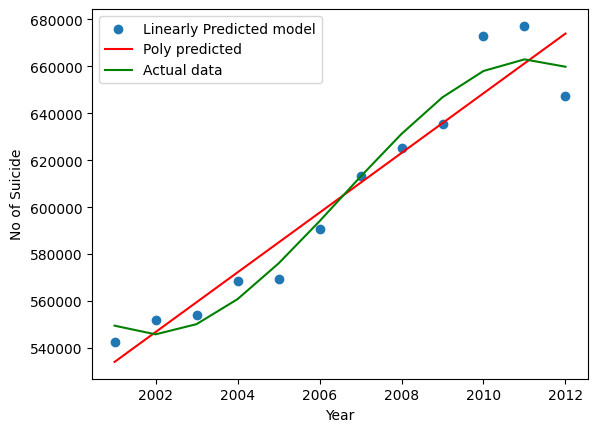

In [47]:
plt.scatter(x,y)
plt.plot(x,yp, color = 'r')
plt.plot(x,y1, color = 'g')
plt.xlabel('Year')
plt.ylabel('No of Suicide')
plt.legend(['Linearly Predicted model','Poly predicted','Actual data'], loc = 'best')
plt.show()

In [48]:
reg1.score(XX,y)

0.9615967065739881

In [49]:
print('Based on our Predicted Model,the expection number of suicides in 2020 using Polynomial Regression Model: ',reg1.predict(poly.transform([[2020]])))

Based on our Predicted Model,the expection number of suicides in 2020 using Polynomial Regression Model:  [[117458.45333099]]


# Based on whole dataset 

In [50]:
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [51]:
cat = []
num = []
for i in df.columns:
    if df[i].dtype == 'O':
        cat.append(i)
    else:
        num.append(i)

In [52]:
df[cat]

,State,Type_code,Type,Gender,Age_group
0,A & N Islands,Causes,Illness (Aids/STD),Female,0-14
1,A & N Islands,Causes,Bankruptcy or Sudden change in Economic,Female,0-14
2,A & N Islands,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14
3,A & N Islands,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14
4,A & N Islands,Causes,Dowry Dispute,Female,0-14
...,...,...,...,...,...
237514,West Bengal,Social_Status,Seperated,Male,0-100+
237515,West Bengal,Social_Status,Widowed/Widower,Male,0-100+
237516,West Bengal,Social_Status,Married,Male,0-100+
237517,West Bengal,Social_Status,Divorcee,Male,0-100+


In [53]:
for i in cat:
    print(f"{i}-- {df[i].nunique()}")

State-- 35
Type_code-- 5
Type-- 69
Gender-- 2
Age_group-- 6


In [54]:
df.drop('State',axis=1,inplace=True)
cat.remove('State')

In [55]:
df = pd.get_dummies(df, columns=cat, drop_first=True)

In [56]:
df.shape

(236583, 80)

In [57]:
df[num]

,Year,Total
0,2001,0
1,2001,0
2,2001,0
3,2001,0
4,2001,0
...,...,...
237514,2012,149
237515,2012,233
237516,2012,5451
237517,2012,189


In [58]:
X = df.drop('Total',axis=1)

In [59]:
y = df['Total']

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc = StandardScaler()

In [62]:
X[['Year']] = sc.fit_transform(X[['Year']])

In [63]:
y

0            0
1            0
2            0
3            0
4            0
          ... 
237514     149
237515     233
237516    5451
237517     189
237518    2658
Name: Total, Length: 236583, dtype: int64

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
linear_model = LinearRegression()

In [67]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [68]:
linear_model.score(X_train,y_train)

0.24544288494139266

In [69]:
linear_model.score(X_test,y_test)

0.25909790973097524

In [70]:
y_pred = linear_model.predict(X_test)

In [71]:
metrics.mean_absolute_error(y_test, y_pred)

44.4169545834801

In [72]:
metrics.mean_squared_error(y_test, y_pred)

30759.490112904503

In [73]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

175.38383652122707

In [74]:
metrics.r2_score(y_test, y_pred)

0.25909790973097524

# Considering all factors give a r2 score of 0.31 (approx)